In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn import model_selection

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_validate, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score

from numpy import mean
from numpy import absolute
from numpy import sqrt

df = pd.read_csv('/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/df_pathways_CST2.csv')

data = df[df['pathway'] == 'HDP']

# Logistic regression
# Variable X contains the explanatory columns --> used to train the model
X = np.array(data['percent_w']).reshape(-1,1)
y = np.array(data['outcome'])

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/df_pathways_CST2.csv'

# Grid search

In [9]:
logistic = LogisticRegression()

penalty = ['l1', 'l2']
C = np.logspace(0,4,10)
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
#hyperparameters = dict(C=C)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X,y)

print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

/home/alba/PycharmProjects/HDP/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/alba/PycharmProjects/HDP/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alba/PycharmProjects/HDP/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/alba/PycharmProjects/HDP/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/alba/PycharmProjects/HDP/venv/lib/python3.7/site-packag

Best penalty: l2
Best C: 1.0


In [10]:
kfold = KFold(n_splits=5, shuffle=True, random_state=50)
model = LogisticRegression(C=1, penalty='l2').fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)

print("Scores:", results)
print('Mean Accuracy:', results.mean()*100)
print("Standard deviation:", results.std())


Scores: [0.83076923 0.83076923 0.72307692 0.69230769 0.765625  ]
Mean Accuracy: 76.85096153846153
Standard deviation: 0.055913688900920126


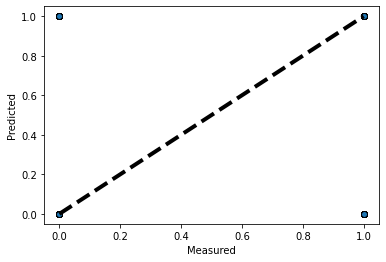

[0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

predicted = cross_val_predict(model, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print(predicted)

In [12]:
# stratified kfold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
model2 = LogisticRegression(C=1, penalty='l2')
results2 = cross_val_score(model2, X, y, cv=kfold)

print("Scores:", results2)
print('Mean Accuracy:', results2.mean()*100)
print("Standard deviation:", results2.std())

Scores: [0.76923077 0.78461538 0.75384615 0.73846154 0.78125   ]
Mean Accuracy: 76.54807692307692
Standard deviation: 0.017287381244591605


# Random Search

In [13]:
C = np.linspace(1, 200)
penalty = ['l1', 'l2']
hyperparameters = dict(C=C)
#hyperparameters = dict(C=C, penalty=penalty)
rsearch = RandomizedSearchCV(model, hyperparameters, n_iter=100, random_state=41)
rsearch.fit(X, y)
print(rsearch.best_params_)

/home/alba/PycharmProjects/HDP/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'C': 1.0}


# Make predictions on new data

In [14]:
# load data
new_data = pd.read_csv('/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/data_effect_preds0.csv')
percent_w = new_data[['percent_w']]
predictions = model.predict(percent_w)

